In [1]:
# package
import pandas as pd # data-set manipulation
import numpy as np # calcualting heavy mathematic and model data nd-array
import matplotlib.pyplot as plt # data visualization
import seaborn as sns # data visualization

In [2]:
## Read Data
data_path = "D:\programs\data_science\prac_1\House_Rent_Dataset.csv"
house_data = pd.read_csv(data_path, index_col="Posted On")
house_data.head()

,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
Posted On,,,,,,,,,,,
2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2022-05-16,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2022-07-04,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
2022-05-09,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner


In [3]:
# data info
house_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4746 entries, 2022-05-18 to 2022-05-04
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   BHK                4746 non-null   int64 
 1   Rent               4746 non-null   int64 
 2   Size               4746 non-null   int64 
 3   Floor              4746 non-null   object
 4   Area Type          4746 non-null   object
 5   Area Locality      4746 non-null   object
 6   City               4746 non-null   object
 7   Furnishing Status  4746 non-null   object
 8   Tenant Preferred   4746 non-null   object
 9   Bathroom           4746 non-null   int64 
 10  Point of Contact   4746 non-null   object
dtypes: int64(4), object(7)
memory usage: 444.9+ KB


In [4]:
# simple dataset summary
house_data.describe()

,BHK,Rent,Size,Bathroom
count,4746.000000,4.746000e+03,4746.000000,4746.000000
mean,2.083860,3.499345e+04,967.490729,1.965866
std,0.832256,7.810641e+04,634.202328,0.884532
min,1.000000,1.200000e+03,10.000000,1.000000
25%,2.000000,1.000000e+04,550.000000,1.000000
50%,2.000000,1.600000e+04,850.000000,2.000000
75%,3.000000,3.300000e+04,1200.000000,2.000000
max,6.000000,3.500000e+06,8000.000000,10.000000


c:\Users\dhruv\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\dhruv\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\dhruv\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\dhruv\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is depr

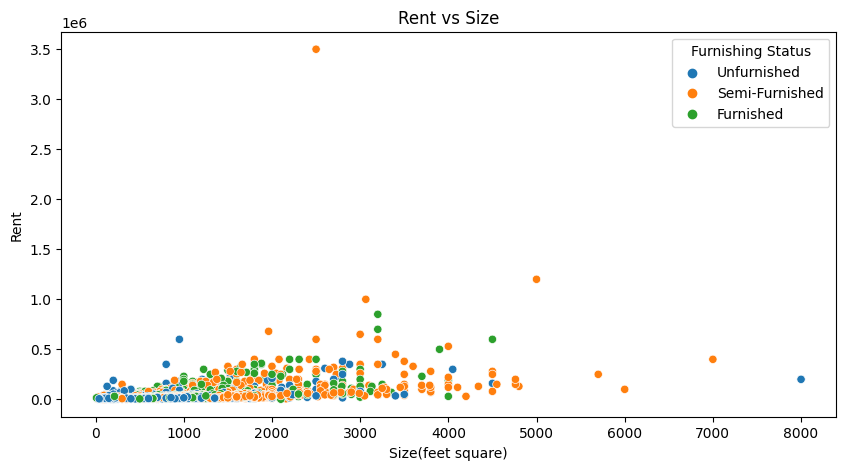

In [5]:
# lets visualize our data in scatter plot to see how our data correlate
plt.figure(figsize=(10,5))
plt.title("Rent vs Size")
plt.xlabel("Size(feet square)")
plt.ylabel("Rent")
# sns.scatterplot(x=house_data['City'],y=house_data['Rent'])
sns.scatterplot(x=house_data['Size'],y=house_data['Rent'],hue=house_data['Furnishing Status'])
plt.show()

c:\Users\dhruv\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\dhruv\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\dhruv\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\dhruv\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is depr

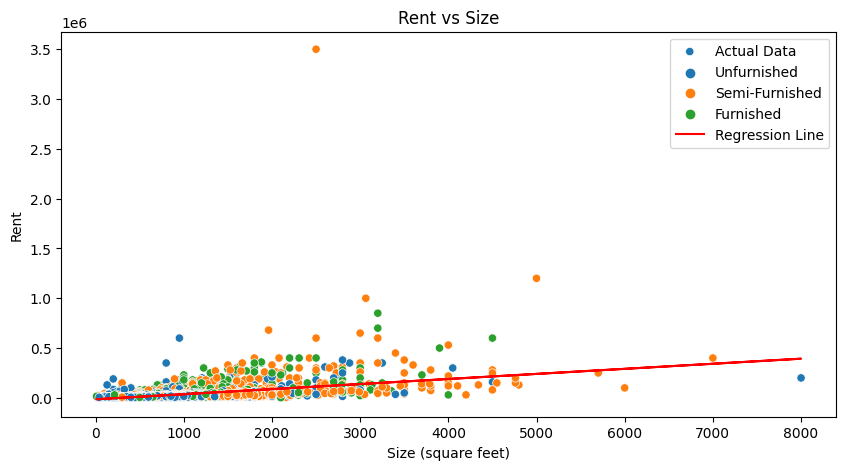

Predicted Price: 444102.3428431281


In [7]:
# Extract data
area = house_data["Size"]
price = house_data["Rent"]

# Calculate regression coefficients manually
mean_area = np.mean(area)
mean_price = np.mean(price)
numerator = np.sum((area - mean_area) * (price - mean_price))
denominator = np.sum((area - mean_area) ** 2)
slope = numerator / denominator
intercept = mean_price - (slope * mean_area)

# Make predictions
predicted_prices = slope * area + intercept

# Calculate the cost/error
error = sum((predicted_prices - price) ** 2) / (2 * len(price))

# Scatter plot of the actual data points
plt.figure(figsize=(10, 5))
plt.title("Rent vs Size")
plt.xlabel("Size (square feet)")
plt.ylabel("Rent")
sns.scatterplot(x=area, y=price, hue=house_data['Furnishing Status'], label="Actual Data")

# Plot the regression line
plt.plot(area, predicted_prices, color='red', label="Regression Line")
plt.legend()
plt.show()

# Predict the house price for a new area
new_area = 9000
predicted_price = slope * new_area + intercept
print("Predicted Price:", predicted_price)